In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score, roc_auc_score, confusion_matrix, average_precision_score
warnings.filterwarnings('ignore')

In [6]:
methods = [
    ('KNN', KNeighborsClassifier(n_neighbors=  3)),
    ('Random Forest', RandomForestClassifier(
        n_estimators=100,
        criterion='entropy',
        class_weight='balanced',
        max_depth=10,
        min_samples_leaf=3,
        random_state=42,
        max_features=17
    )),
    ('MLP', MLPClassifier(
        hidden_layer_sizes=(100,),
        activation='relu',
        solver='adam',
        alpha=0.0001,
    )),
    ('SVM', SVC(
        kernel = 'rbf',
        C = 1,
        gamma = 'scale',
        class_weight='balanced',
        probability=True
        ))
]

In [7]:
methods2 = [
    ('Origin', 'Data/d1/Balanced Data/origin.csv'),
    ('SMOTE', 'Data/d1/Balanced Data/SMOTE.csv'),
    # ('SMOTE NC', 'Data/d1/Balanced Data/SMOTENC.csv'),
    ('ADASYN', 'Data/d1/Balanced Data/ADASYN.csv'),
    ('Near Miss', 'Data/d1/Balanced Data/NearMiss.csv'),
    ('Tomek Links', 'Data/d1/Balanced Data/TomekLinks.csv'),
    ('ENN', 'Data/d1/Balanced Data/ENN.csv'),
    ('SMOTE ENN', 'Data/d1/Balanced Data/SMOTEENN.csv'),
    ('SMOTE Tomek', 'Data/d1/Balanced Data/SMOTETomek.csv')
]

# 2. Huấn luyện mô hình

In [ ]:
# from re import X
project_url = '../../../../source/DU_AN_CNTT_2/'
project_url = glob.glob(project_url)[0]
scores_list = []
time_list = []
test = pd.read_csv(os.path.join(project_url, 'Data/d1/test.csv')).copy()
X_test = test.drop('Class', axis=1)
y_test = test['Class']
import time
for name, method in methods:
    print(f'Model: {name}')
    print('-'*100)
    for name2, path in methods2:
        print(f'Model: {name}. Method: {name2}')
        start = time.time()
        path = os.path.join(project_url, path)
        df = pd.read_csv(path).copy()
        X_train = df.drop('Class', axis=1)
        y_train = df['Class']
        # if name == 'SVM':
        #     X_train = X_train.sample(frac=0.4, random_state=42)
        #     y_train = y_train.loc[X_train.index]
        #     X_train.reset_index(drop=True, inplace=True)
        #     y_train.reset_index(drop=True, inplace=True)
        method.fit(X_train, y_train)
        y_pred = method.predict(X_test)
        y_prob = method.predict_proba(X_test)
        precision = precision_score(y_test, y_pred, average = None)
        recall = recall_score(y_test, y_pred, average = None)
        f1 = f1_score(y_test, y_pred, average = None)
        average_pre = average_precision_score(y_test, y_prob, average = None)
        roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average = None)
        cm = confusion_matrix(y_test, y_pred)
        scores = {
            'Method': ' - '.join([name2, name]),
            'Precision': precision,
            'Average Precision': average_pre,
            'Recall': recall,
            'F1 Score': f1,
            'ROC AUC': roc_auc,
            'Confusion Matrix': cm
        }
        end = time.time()
        t = np.round(end - start, 2)
        t = {
            'Method': ' - '.join([name2, name]),
            'Time': t
        }
        print(f'Precision: {precision}')
        print(f'Recall: {recall}')
        print(f'Time to train {t["Method"]} is {t["Time"]} seconds.\n')
        time_list.append(t)
        scores_list.append(scores)




Model: KNN
----------------------------------------------------------------------------------------------------
Model: KNN. Method: Origin
Precision: [0.52910053 0.00763359 0.15752461]
Recall: [0.65907729 0.003003   0.1218716 ]
Time to train Origin - KNN is 0.46 seconds.

Model: KNN. Method: SMOTE
Precision: [0.54294479 0.04512373 0.18064516]
Recall: [0.42420611 0.09309309 0.1828074 ]
Time to train SMOTE - KNN is 0.5 seconds.

Model: KNN. Method: ADASYN
Precision: [0.54075235 0.04237288 0.18249733]
Recall: [0.41342121 0.09009009 0.18607182]
Time to train ADASYN - KNN is 0.51 seconds.

Model: KNN. Method: Near Miss
Precision: [0.52138254 0.06087937 0.17431193]
Recall: [0.53325345 0.16216216 0.06202394]
Time to train Near Miss - KNN is 0.44 seconds.

Model: KNN. Method: Tomek Links
Precision: [0.5345732  0.01724138 0.16923077]
Recall: [0.67165968 0.00900901 0.11969532]
Time to train Tomek Links - KNN is 0.5 seconds.

Model: KNN. Method: ENN
Precision: [0.66082384 0.13976041 0.37037037]
R

In [9]:
s = pd.DataFrame(scores_list)
s.index = pd.MultiIndex.from_tuples(s['Method'].apply(lambda x: (x.split(' - ')[1], x.split(' - ')[0])))
s = s.drop('Method', axis=1)
s.index.names = ['Model', 'Method']
s['Confusion Matrix']

Model          Method     
KNN            Origin          [[1100, 70, 499], [232, 1, 100], [747, 60, 112]]
               SMOTE          [[708, 352, 609], [149, 31, 153], [447, 304, 1...
               ADASYN         [[690, 374, 605], [142, 30, 161], [444, 304, 1...
               Near Miss       [[890, 570, 209], [218, 54, 61], [599, 263, 57]]
               Tomek Links      [[1121, 94, 454], [244, 3, 86], [732, 77, 110]]
               ENN               [[754, 900, 15], [86, 245, 2], [301, 608, 10]]
               SMOTE ENN      [[594, 632, 443], [68, 175, 90], [218, 458, 243]]
               SMOTE Tomek    [[743, 360, 566], [164, 29, 140], [481, 297, 1...
Random Forest  Origin         [[846, 326, 497], [95, 129, 109], [328, 301, 2...
               SMOTE          [[852, 216, 601], [104, 108, 121], [344, 202, ...
               ADASYN         [[912, 220, 537], [99, 112, 122], [352, 215, 3...
               Near Miss      [[306, 1021, 342], [117, 99, 117], [312, 462, ...
               Tomek Links    [[885, 285, 499], [96, 104, 133], [353, 273, 2...
               ENN              [[797, 787, 85], [77, 246, 10], [285, 564, 70]]
               SMOTE ENN      [[711, 406, 552], [73, 157, 103], [248, 323, 3...
               SMOTE Tomek    [[852, 227, 590], [97, 110, 126], [346, 214, 3...
MLP            Origin              [[1582, 10, 77], [291, 7, 35], [841, 4, 74]]
               SMOTE          [[842, 420, 407], [85, 176, 72], [302, 317, 300]]
               ADASYN         [[939, 337, 393], [106, 158, 69], [370, 259, 2...
               Near Miss      [[367, 925, 377], [106, 111, 116], [204, 455, ...
               Tomek Links          [[1565, 8, 96], [284, 4, 45], [824, 2, 93]]
               ENN                 [[908, 760, 1], [98, 234, 1], [367, 550, 2]]
               SMOTE ENN      [[618, 865, 186], [62, 239, 32], [217, 569, 133]]
               SMOTE Tomek    [[881, 485, 303], [95, 184, 54], [337, 350, 232]]
SVM            Origin         [[810, 448, 411], [75, 182, 76], [280, 336, 303]]
               SMOTE          [[758, 471, 440], [70, 180, 83], [269, 336, 314]]
               ADASYN         [[779, 461, 429], [73, 182, 78], [270, 350, 299]]
               Near Miss      [[597, 725, 347], [149, 87, 97], [323, 368, 228]]
               Tomek Links    [[847, 429, 393], [85, 175, 73], [301, 326, 292]]
               ENN            [[767, 536, 366], [82, 187, 64], [270, 387, 262]]
               SMOTE ENN      [[769, 463, 437], [88, 182, 63], [260, 352, 307]]
               SMOTE Tomek    [[748, 471, 450], [68, 183, 82], [265, 338, 316]]
Name: Confusion Matrix, dtype: object

In [10]:
cm = s['Confusion Matrix']
s.drop('Confusion Matrix', axis=1, inplace=True)
names = ['No Diabetes', 'Prediabetes', 'Diabetes']
cols = s.columns
for i in cols:
    s[i] = s[i].apply(lambda x: np.round(x, 4)*100)
    for j in range(len(names)):
        s[(i, names[j])] = s[i].apply(lambda x: x[j])
    s[(i,'macro')] = s[i].apply(lambda x: np.round(np.mean(x),2))
s.drop(cols, axis=1, inplace=True)
s.columns = pd.MultiIndex.from_tuples(s.columns)
s

Precision                              \
                          No Diabetes Prediabetes Diabetes  macro   
Model         Method                                                
KNN           Origin            52.91        0.76    15.75  23.14   
              SMOTE             54.29        4.51    18.06  25.62   
              ADASYN            54.08        4.24    18.25  25.52   
              Near Miss         52.14        6.09    17.43  25.22   
              Tomek Links       53.46        1.72    16.92  24.03   
              ENN               66.08       13.98    37.04  39.03   
              SMOTE ENN         67.50       13.83    31.31  37.55   
              SMOTE Tomek       53.53        4.23    16.65  24.80   
Random Forest Origin            66.67       17.06    32.37  38.70   
              SMOTE             65.54       20.53    34.06  40.04   
              ADASYN            66.91       20.48    34.82  40.74   
              Near Miss         41.63        6.26    24.01  23.97   
              Tomek Links       66.34       15.71    31.68  37.91   
              ENN               68.77       15.40    42.42  42.20   
              SMOTE ENN         68.90       17.72    34.70  40.44   
              SMOTE Tomek       65.79       19.96    33.40  39.72   
MLP           Origin            58.29       33.33    39.78  43.80   
              SMOTE             68.51       19.28    38.51  42.10   
              ADASYN            66.36       20.95    38.56  41.96   
              Near Miss         54.21        7.44    34.53  32.06   
              Tomek Links       58.55       28.57    39.74  42.29   
              ENN               66.13       15.16    50.00  43.76   
              SMOTE ENN         68.90       14.29    37.89  40.36   
              SMOTE Tomek       67.10       18.06    39.39  41.52   
SVM           Origin            69.53       18.84    38.35  42.24   
              SMOTE             69.10       18.24    37.51  41.62   
              ADASYN            69.43       18.33    37.10  41.62   
              Near Miss         55.85        7.37    33.93  32.38   
              Tomek Links       68.69       18.82    38.52  42.01   
              ENN               68.54       16.85    37.86  41.08   
              SMOTE ENN         68.85       18.25    38.04  41.71   
              SMOTE Tomek       69.20       18.45    37.26  41.64   

                          Average Precision                              \
                                No Diabetes Prediabetes Diabetes  macro   
Model         Method                                                      
KNN           Origin                  56.46       10.57    27.60  31.54   
              SMOTE                   57.18       10.31    26.54  31.34   
              ADASYN                  57.00       10.29    26.66  31.32   
              Near Miss               52.82        9.16    28.25  30.08   
              Tomek Links             57.83       10.67    28.25  32.25   
              ENN                     63.39       14.57    31.51  36.49   
              SMOTE ENN               64.03       12.83    31.18  36.01   
              SMOTE Tomek             57.22       10.32    26.71  31.42   
Random Forest Origin                  70.06       15.06    31.36  38.83   
              SMOTE                   69.18       16.01    31.64  38.94   
              ADASYN                  69.87       16.21    31.47  39.18   
              Near Miss               51.27        7.80    29.51  29.53   
              Tomek Links             70.19       14.59    31.67  38.82   
              ENN                     70.24       19.81    35.91  41.99   
              SMOTE ENN               70.00       16.33    34.33  40.22   
              SMOTE Tomek             69.62       15.96    31.31  38.96   
MLP           Origin                  69.42       20.13    38.37  42.64   
              SMOTE                   69.22       19.86    36.75  41.94   
              ADASYN                 

In [11]:
metrics = s.columns.get_level_values(0).drop_duplicates()
for metric in metrics:
    path = os.path.join(project_url, f'Result/d1/Scores/{metric}.csv')
    s[metric].to_csv(path)
    print(f'Saved {metric}.')

Saved Precision.
Saved Average Precision.
Saved Recall.
Saved F1 Score.
Saved ROC AUC.


In [12]:
import matplotlib.gridspec as gridspec

Saved /content/drive/MyDrive/DỰ ÁN CNTT 2/Result/d1/ConfusionMatrix.png.


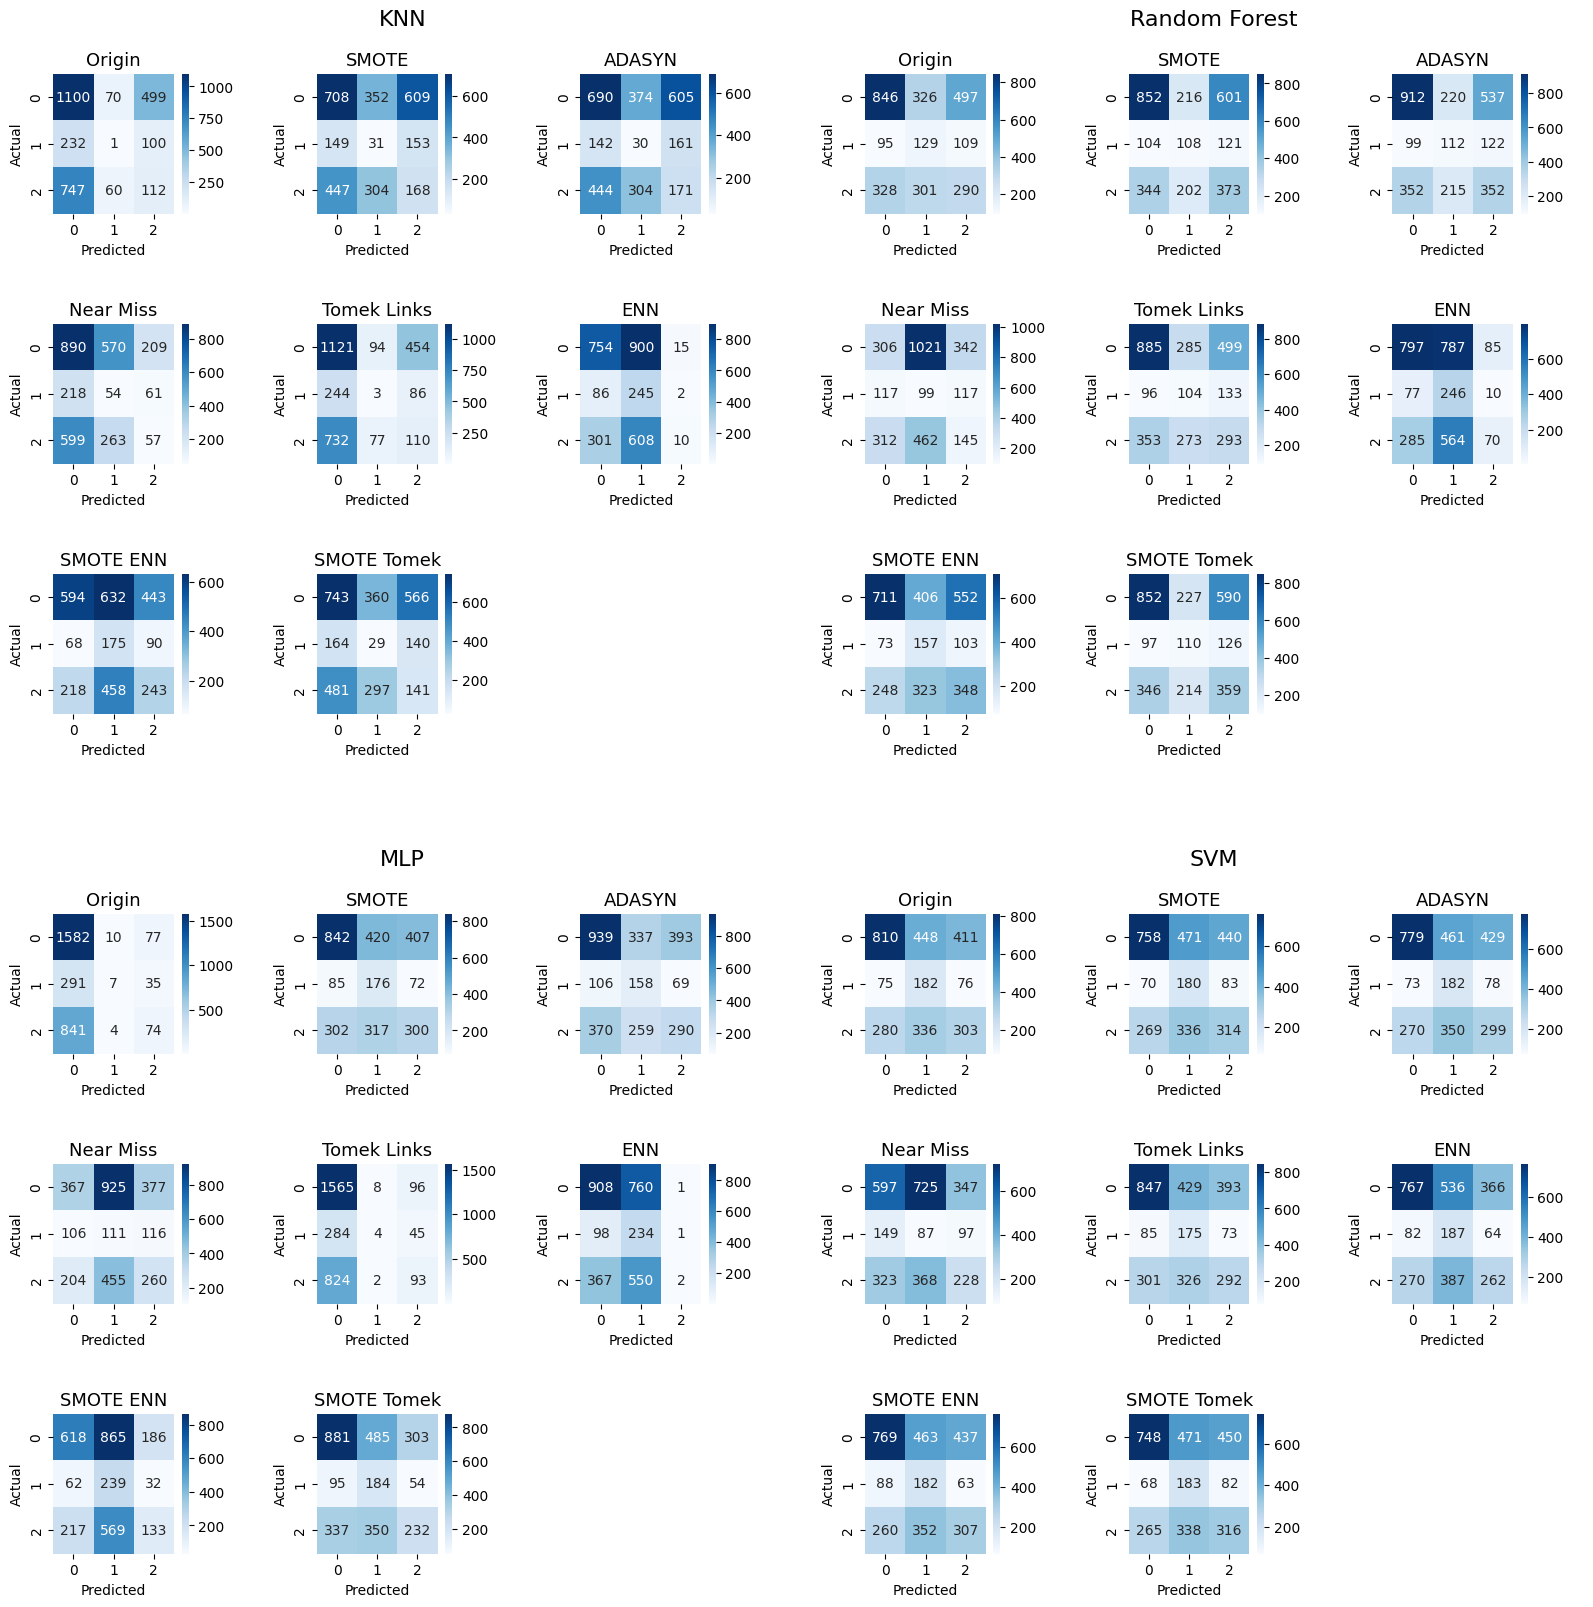

In [13]:
models = cm.index.get_level_values(0).drop_duplicates()
methods = cm.index.get_level_values(1).drop_duplicates()
gs = gridspec.GridSpec(2, 2, wspace=0.1, hspace=0.2)

c2 = 0
fig = plt.figure(figsize=(20,20))
# fig.suptitle('Confusion Matrix', fontsize=10)
for model in models:
    c = 0
    gs2 = gridspec.GridSpecFromSubplotSpec(3,3,
                    subplot_spec=gs[c2], wspace=0.25, hspace=0.25)
    ax = fig.add_subplot(gs[c2])
    ax.set_title(f'{model}', fontsize=16)
    ax.axis('off')
    for method in methods:
        pos = gs2[c].get_position(fig)
        pos.x0 += 0.01
        pos.y0 += 0.01
        pos.x1 -= 0.02
        pos.y1 -= 0.02
        ax2 = plt.Subplot(fig, pos)
        # ax2 = plt.Subplot(fig, gs2[c])

        ax2.set_title(f'{method}', fontsize = 13)
        cm_ = cm[(model, method)]
        sns.heatmap(cm_, annot=True, fmt='g', cmap='Blues', ax=ax2)
        ax2.set_xlabel('Predicted')
        ax2.set_ylabel('Actual')
        c += 1
        fig.add_axes(ax2)
        plt.tight_layout()
    c2 += 1
fig.show()
path = os.path.join(project_url, f'Result/d1/ConfusionMatrix.png')
# plt.savefig(path)
fig.savefig(path, bbox_inches='tight')
print(f'Saved {path}.')

In [14]:
# time_list = time_list.reset_index()

In [15]:
times = pd.DataFrame(time_list)
times.index = pd.MultiIndex.from_tuples(times['Method'].apply(lambda x: (x.split(' - ')[1], x.split(' - ')[0])))
times = times.drop('Method', axis=1)
times.index.names = ['Model', 'Method']
times

Time
Model         Method             
KNN           Origin         0.46
              SMOTE          0.50
              ADASYN         0.51
              Near Miss      0.44
              Tomek Links    0.50
              ENN            0.38
              SMOTE ENN      0.36
              SMOTE Tomek    0.36
Random Forest Origin         1.37
              SMOTE          3.79
              ADASYN         4.52
              Near Miss      0.60
              Tomek Links    1.26
              ENN            0.59
              SMOTE ENN      0.94
              SMOTE Tomek    3.14
MLP           Origin         7.45
              SMOTE         11.30
              ADASYN        18.77
              Near Miss      2.02
              Tomek Links    4.72
              ENN            1.95
              SMOTE ENN      3.83
              SMOTE Tomek   27.99
SVM           Origin        61.90
              SMOTE        132.47
              ADASYN       152.39
              Near Miss      7.17
              Tomek Links   51.10
              ENN            2.52
              SMOTE ENN      5.11
              SMOTE Tomek  143.41

In [16]:
times.pivot_table(index='Method', columns='Model', values='Time', sort=False).\
    to_csv(os.path.join(project_url, 'Result/d1/Times.csv'))